# Desarrollo Proyecto 7008, ViT [EXP 2]

Angelo Muñoz

# Readme:
Adjuntar estos archivo a "mi unidad" en su drive.

[datos.zip](https://drive.google.com/file/d/1TaQCJFK5sB1nfLM9eZuDllPdRayfAwJr/view?usp=sharing)

[archivos_txt](https://drive.google.com/file/d/19DDb9JtURg1UHICc-7EBd4KkVmJY39NQ/view?usp=sharing)

[df_test_clean](https://drive.google.com/file/d/1nJlicgCFtwr0PRPjzuFCPm6TK6JcxR1g/view?usp=drive_link)

[df_train_clean](https://drive.google.com/file/d/1kRofdUPHObkdMCeo0MRcJTKG9s0e5DDx/view?usp=sharing)


In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Cargando la data:

In [2]:
# Crear una carpeta llamada "dataset" en la ruta /content/
!mkdir -p /content/dataset/

# Descomprimir el archivo en la carpeta recién creada
!unzip /content/drive/MyDrive/Images.zip -d /content/dataset/

#creando carpeta para los txt
!mkdir -p /content/textos/
# Descomprimiendolos
!unzip /content/drive/MyDrive/Yoga-82.zip -d /content/textos/


Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_52.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_53.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_54.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_55.jpg  
 extracting: /content/dataset/Images/Supta_Virasana_Vajrasana/4_56.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_57.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_58.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_61.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_65.jpg  
 extracting: /content/dataset/Images/Supta_Virasana_Vajrasana/4_66.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_67.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_68.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4

## Imports

In [3]:
pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.7 MB/s eta 0:00:00


In [4]:
import sys
!git clone https://github.com/FrinyildV/EL7008_ViT_tf_ammc VIT_imp
sys.path.append("VIT_imp")


Cloning into 'VIT_imp'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 42 (delta 9), reused 42 (delta 9), pack-reused 0
Receiving objects: 100% (42/42), 8.10 KiB | 8.10 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [5]:
from VIT_imp.funciones.auxiliares import *
from VIT_imp.modelo.vit import *

In [6]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from tqdm import tqdm, trange

import cv2

import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader

from torchvision.transforms import ToTensor
from torchvision.datasets.mnist import MNIST

np.random.seed(0)
torch.manual_seed(0)



from torch import Tensor
from einops import rearrange , reduce, repeat
from einops.layers.torch import Rearrange, Reduce

from sklearn.model_selection import train_test_split

from sklearn import metrics as metsk
import matplotlib.pyplot as plt

from torchsummary import summary


## Código para limpiar los datos:

In [ ]:
# import pandas as pd

# headers=['ruta','clases_6','clases_20','clases_82']
# path_train = '/content/textos/Yoga-82/yoga_train.txt'
# df_train = pd.read_csv(path_train,sep=',',names=headers)

# path_test = '/content/textos/Yoga-82/yoga_test.txt'
# df_test = pd.read_csv(path_test,sep=',',names=headers)

In [ ]:
# img_mala=cv2.imread('/content/dataset/Images/'+"Akarna_Dhanurasana/84.jpg")
# # Calcular el histograma usando NumPy
# histograma = np.histogram(img_mala.flatten(), bins=256, range=[0,256])

# # Mostrar el histograma
# plt.bar(histograma[1][:-1], histograma[0], color='b', alpha=0.7)
# plt.title('Histograma de la imagen')
# plt.xlabel('Valor del píxel')
# plt.ylabel('Frecuencia')
# plt.show()

In [ ]:
# import cv2
# from tqdm import tqdm
# from google.colab.patches import cv2_imshow
# marcadas=[]
# for i,ruta in tqdm(enumerate(df_train['ruta'])):
#   img_path = '/content/dataset/Images/'+ruta
#   try:
#       img = cv2.imread(img_path)
#       # Verificar si la imagen se abrió con éxito y tiene dimensiones válidas
#       if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
#           marcadas.append(0)
#       else: marcadas.append(1)
#           # print(f"Warning: No se pudo leer la imagen {img_path} o tiene dimensiones no válidas.")
#   except Exception as e:
#       print(f"Error al abrir la imagen {img_path}: {e}")
# df_train['marcadas']=marcadas

In [ ]:
# df_train[df_train['marcadas']==1]

In [ ]:
# marcadas=[]
# for i,ruta in tqdm(enumerate(df_test['ruta'])):
#   img_path = '/content/dataset/Images/'+ruta
#   try:
#       img = cv2.imread(img_path)
#       # Verificar si la imagen se abrió con éxito y tiene dimensiones válidas
#       if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
#           marcadas.append(0)
#       else: marcadas.append(1)
#           # print(f"Warning: No se pudo leer la imagen {img_path} o tiene dimensiones no válidas.")
#   except Exception as e:
#       print(f"Error al abrir la imagen {img_path}: {e}")
# df_test['marcadas']=marcadas

In [ ]:
# df_test[df_test['marcadas']==0]

In [ ]:
# #filtrando
# df_train=df_train[df_train['marcadas']==0]
# df_test=df_test[df_test['marcadas']==0]

# df_train = df_train.drop('marcadas', axis=1)
# df_test = df_test.drop('marcadas', axis=1)

# # Guardar el DataFrame en un archivo CSV
# df_train.to_csv('/content/drive/MyDrive/df_train_clean.csv', index=False)
# df_test.to_csv('/content/drive/MyDrive/df_test_clean.csv', index=False)

## Data limpia:

In [7]:

# headers=['ruta','clases_6','clases_20','clases_82']
path_clean_train = '/content/drive/MyDrive/df_train_clean.csv'
path_clean_test = '/content/drive/MyDrive/df_test_clean.csv'
df_train=pd.read_csv(path_clean_train)
df_test=pd.read_csv(path_clean_test)

# Entrenamiento:

### Extrayendo media y desv:

In [ ]:
# def online_mean_and_sd(loader):
#     """Compute the mean and sd in an online fashion

#         Var[x] = E[X^2] - E^2[X]
#     """
#     cnt = 0
#     fst_moment = torch.empty(3)
#     snd_moment = torch.empty(3)

#     for images, _ in loader:
#         b, c, h, w = images.shape
#         nb_pixels = b * h * w
#         sum_ = torch.sum(images, dim=[0, 2, 3])
#         sum_of_square = torch.sum(images ** 2, dim=[0, 2, 3])
#         fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
#         snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)

#         cnt += nb_pixels

#     return fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)



# resize_dim=(224,224)
# batch_size_train=32
# # Transformaciones para calcular las medias y las desv
# trans_metricas = transforms.Compose([
#     transforms.ToPILImage(), #<- necesario para usar resize
#     transforms.ToTensor(),
#     transforms.Resize(resize_dim)

# ])


# path_ruta_images = '/content/dataset/Images/'
# # dataset_train_metrics = Lector(ind0_train, ind1_train, folders, labels, transform=trans_metricas)
# dataset_train_metrics = Lector(data=df_train, modo=6, ruta_images=path_ruta_images, transform=trans_metricas)

# train_loader = DataLoader(dataset_train_metrics, batch_size_train,
#                           shuffle = True, num_workers = 2, pin_memory = True)

# # data_mean, data_std =online_mean_and_sd(train_loader)
# mean_train,std_train=online_mean_and_sd(train_loader)

---------

## dataloaders

In [ ]:
# metricas para 240x240
# mean_train=torch.tensor([0.6264, 0.6526, 0.6734])
# std_train = torch.tensor([0.3382, 0.3224, 0.3226])


In [8]:
# metricas para 224 x 224
mean_train = torch.tensor([0.6265, 0.6526, 0.6734])
std_train = torch.tensor([0.3381, 0.3223, 0.3225])

In [9]:
#%%%%%%% creando conjunto de validación: %%%%%%%%%

# df_train es tu DataFrame
X = df_train['ruta']
y = df_train['clases_82']

# Divide los datos en conjuntos de entrenamiento y validación con estratificación
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

df_val = df_train.iloc[X_val.index]
df_train = df_train.iloc[X_train.index]
#%%%%%%%%%%%%%%%%%

resize_dim=(224,224)
clases=82
path_ruta_images = '/content/dataset/Images/'

# Transformaciones que deseas aplicar a tus datos
transform_train = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.ToTensor(),  # Convierte la imagen a un tensor
    transforms.Resize(resize_dim),
    transforms.Normalize(mean_train, std_train),
    transforms.RandomHorizontalFlip(0.5),
])
transform_val_test = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.ToTensor(),  # Convierte la imagen a un tensor
    transforms.Resize(resize_dim),
    transforms.Normalize(mean_train, std_train),
])

# Crear una instancia de la clase Lector con los datos cargados

dataset_train = Lector(data=df_train, modo=clases, ruta_images=path_ruta_images, transform=transform_train)
dataset_val = Lector(data=df_val, modo=clases, ruta_images=path_ruta_images, transform=transform_val_test)
dataset_test = Lector(data=df_test, modo=clases, ruta_images=path_ruta_images, transform=transform_val_test)
# Crear un DataLoader para el conjunto de entrenamiento
batch_size_n = 32  # ajusta según sea necesario #800
train_loader  = DataLoader(dataset_train, batch_size=batch_size_n, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size_n, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=batch_size_n, shuffle=False)


## Train 82 clases

Using device:  cuda (Tesla T4)


Epoch 1 in training:   0%|          | 0/376 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(

Epoch 1 in training: 100%|██████████| 376/376 [10:58<00:00,  1.88s/it]
                                                                      

Train accuracy: 3.48%
Epoch 1/10 loss: 4.34



Training:  10%|█         | 1/10 [13:29<2:01:25, 809.49s/it]

Val loss: 4.28
Val accuracy: 3.99%



Epoch 2 in training: 100%|██████████| 376/376 [10:48<00:00,  1.73s/it]
                                                                      

Train accuracy: 4.82%
Epoch 2/10 loss: 4.25



Training:  20%|██        | 2/10 [26:46<1:46:57, 802.23s/it]

Val loss: 4.16
Val accuracy: 6.08%



Epoch 3 in training: 100%|██████████| 376/376 [10:52<00:00,  1.53s/it]
                                                                      

Train accuracy: 6.50%
Epoch 3/10 loss: 4.09



Training:  30%|███       | 3/10 [40:07<1:33:31, 801.61s/it]

Val loss: 4.02
Val accuracy: 8.14%



Epoch 4 in training: 100%|██████████| 376/376 [10:51<00:00,  1.88s/it]
                                                                      

Train accuracy: 8.93%
Epoch 4/10 loss: 3.95



Training:  40%|████      | 4/10 [53:28<1:20:09, 801.55s/it]

Val loss: 3.93
Val accuracy: 9.14%



Epoch 5 in training: 100%|██████████| 376/376 [10:54<00:00,  1.55s/it]
                                                                      

Train accuracy: 10.80%
Epoch 5/10 loss: 3.83



Training:  50%|█████     | 5/10 [1:06:53<1:06:53, 802.70s/it]

Val loss: 3.85
Val accuracy: 10.57%



Epoch 6 in training: 100%|██████████| 376/376 [11:00<00:00,  2.27s/it]
                                                                      

Train accuracy: 12.87%
Epoch 6/10 loss: 3.71



Training:  60%|██████    | 6/10 [1:20:26<53:44, 806.09s/it]  

Val loss: 3.77
Val accuracy: 12.43%



Epoch 7 in training: 100%|██████████| 376/376 [11:10<00:00,  2.00s/it]
                                                                      

Train accuracy: 15.24%
Epoch 7/10 loss: 3.56



Training:  70%|███████   | 7/10 [1:34:09<40:35, 811.79s/it]

Val loss: 3.65
Val accuracy: 14.16%



Epoch 8 in training: 100%|██████████| 376/376 [11:02<00:00,  2.17s/it]
                                                                      

Train accuracy: 17.30%
Epoch 8/10 loss: 3.44



Training:  80%|████████  | 8/10 [1:47:45<27:05, 812.91s/it]

Val loss: 3.59
Val accuracy: 15.69%



Epoch 9 in training: 100%|██████████| 376/376 [10:54<00:00,  1.96s/it]
                                                                      

Train accuracy: 20.30%
Epoch 9/10 loss: 3.30



Training:  90%|█████████ | 9/10 [2:01:13<13:31, 811.50s/it]

Val loss: 3.52
Val accuracy: 16.69%



Epoch 10 in training: 100%|██████████| 376/376 [11:05<00:00,  1.47s/it]
                                                                       

Train accuracy: 22.76%
Epoch 10/10 loss: 3.16



Training: 100%|██████████| 10/10 [2:14:51<00:00, 809.12s/it]


Val loss: 3.50
Val accuracy: 17.75%


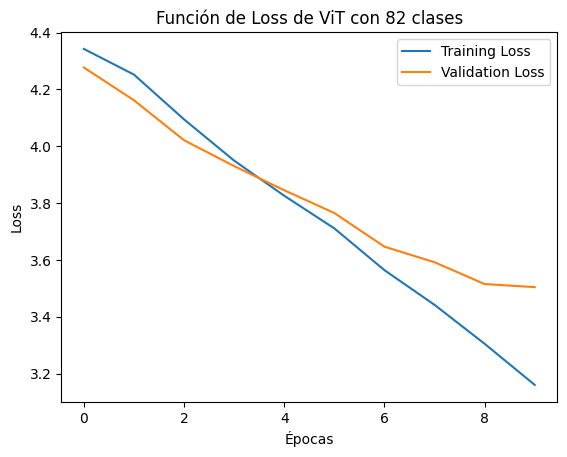

In [10]:

# Defining model and training options
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: ", device, f"({torch.cuda.get_device_name(device)})" if torch.cuda.is_available() else "")


model = ViT((3, 224, 224), n_patches=14, n_blocks=12, \
              hidden_d=768, n_heads=12, out_d=clases).to(device)     #hidden_d =768



N_EPOCHS = 10 #5
LR = 0.00005 #0.005

# Training loop
optimizer = Adam(model.parameters(), lr=LR)
criterion = CrossEntropyLoss()

ruta_modelo_inicial = '/content/drive/MyDrive/exp_1_chk_82.pth'
ruta_opt_inicial = '/content/drive/MyDrive/exp_1_optimizer_82.pth'
titulo_grafico = f'Función de Loss de ViT con {clases} clases'

train_funcion(red=model,criterio=criterion,optimizador=optimizer,ruta_guardado_red=ruta_modelo_inicial,
              ruta_guardado_optimizer=ruta_opt_inicial, dataloader_train = train_loader,
              dataloader_val = val_loader ,titulo_grafico_loss = titulo_grafico,
              n_epoch = N_EPOCHS )


In [11]:
import os
#%%%%%%%%% listas con labels:
base_folder = '/content/dataset/Images/'
label_names_82 = os.listdir(base_folder)
label_names_82.remove('.DS_Store')

label_names_6 = ['standing', 'sitting', 'balancing', 'inverted', 'reclining', 'wheel']
label_names_20= [
    'standing_straight', 'standing_forward bend', 'standing_side bend', 'standing_others',
    'sitting_normal1', 'sitting_normal2', 'sitting_split', 'sitting_forward bend', 'sitting_twist',
    'balancing_front', 'balancing_side', 'inverted_legs straight up', 'inverted_legs bend',
    'reclining_up-facing', 'reclining_down-facing', 'reclining_side-facing', 'reclining_plank balance',
    'wheel_up-facing', 'wheel_down-facing', 'wheel_others'
]



## Evaluación train

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Metricas modelo : Exp 1, 82 clases, Conjunto de Train


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                           precision    recall  f1-score   support

                                                       Akarna_Dhanurasana     0.0000    0.0000    0.0000        52
                             Bharadvaja's_Twist_pose_or_Bharadvajasana_I_     0.5368    0.3110    0.3938       164
                                         Boat_Pose_or_Paripurna_Navasana_     0.2556    0.3416    0.2924       202
                                     Bound_Angle_Pose_or_Baddha_Konasana_     0.1765    0.0390    0.0638       154
                                                 Bow_Pose_or_Dhanurasana_     0.0909    0.0091    0.0165       110
                                 Bridge_Pose_or_Setu_Bandha_Sarvangasana_     0.2701    0.2662    0.2681       139
                                                 Camel_Pose_or_Ustrasana_     0.3167    0.1792    0.2289       106
                                            Cat_Cow_Pose_or_Marjaryasana_     0

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Metricas modelo : Exp 1, 82 clases, Conjunto de Val
                                                                           precision    recall  f1-score   support

                                                       Akarna_Dhanurasana     0.0000    0.0000    0.0000        13
                             Bharadvaja's_Twist_pose_or_Bharadvajasana_I_     0.3333    0.2927    0.3117        41
                                         Boat_Pose_or_Paripurna_Navasana_     0.1884    0.2549    0.2167        51
                                     Bound_Angle_Pose_or_Baddha_Konasana_     0.0000    0.0000    0.0000        39
                                                 Bow_Pose_or_Dhanurasana_     0.2500    0.0370    0.0645        27
                                 Bridge_Pose_or_Setu_Bandha_Sarvangasana_     0.2812    0.2571    0.2687        35
                                                 Camel_Pose_or_Ustrasana_     0.0769    0.0370    0.0500        27
                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/f

Metricas modelo : Exp 1, 82 clases, Conjunto de Test
                                                                           precision    recall  f1-score   support

                                                       Akarna_Dhanurasana     0.0000    0.0000    0.0000        20
                             Bharadvaja's_Twist_pose_or_Bharadvajasana_I_     0.3621    0.2471    0.2937        85
                                         Boat_Pose_or_Paripurna_Navasana_     0.2170    0.2674    0.2396        86
                                     Bound_Angle_Pose_or_Baddha_Konasana_     0.2000    0.0893    0.1235        56
                                                 Bow_Pose_or_Dhanurasana_     0.0000    0.0000    0.0000        55
                                 Bridge_Pose_or_Setu_Bandha_Sarvangasana_     0.1724    0.1639    0.1681        61
                                                 Camel_Pose_or_Ustrasana_     0.1429    0.0755    0.0988        53
                          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


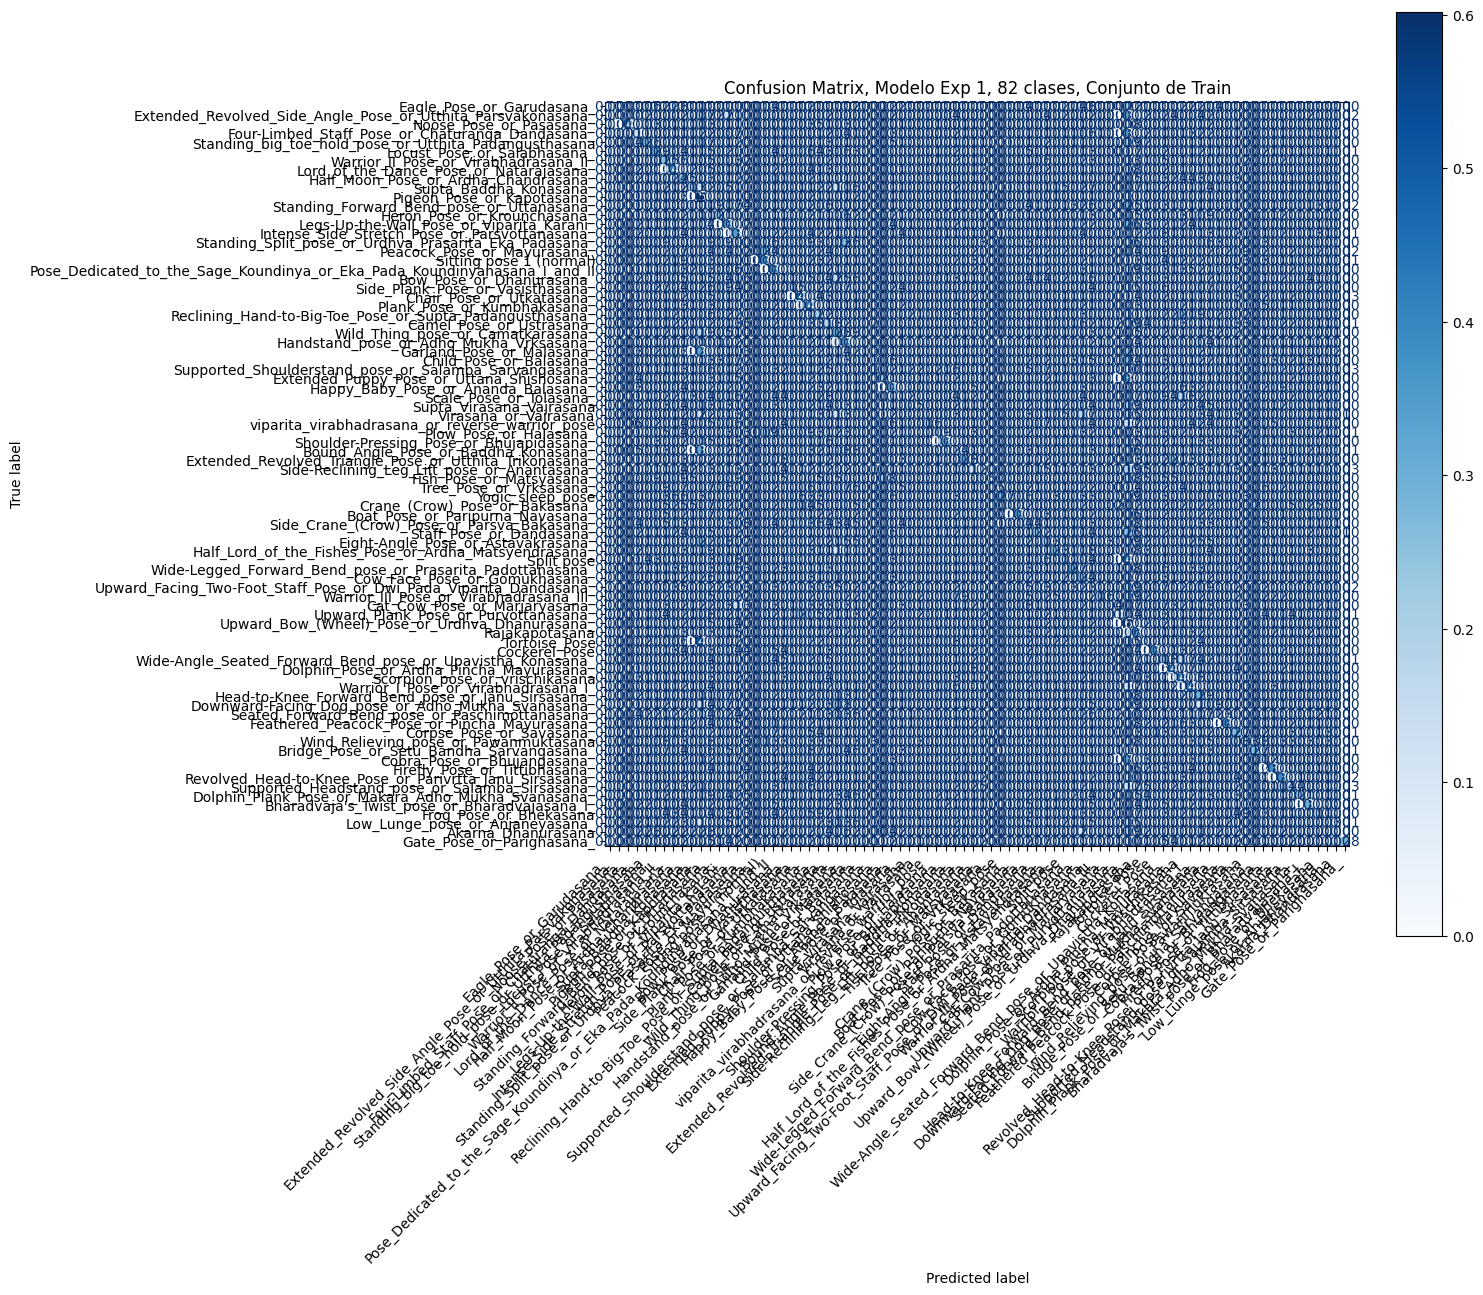

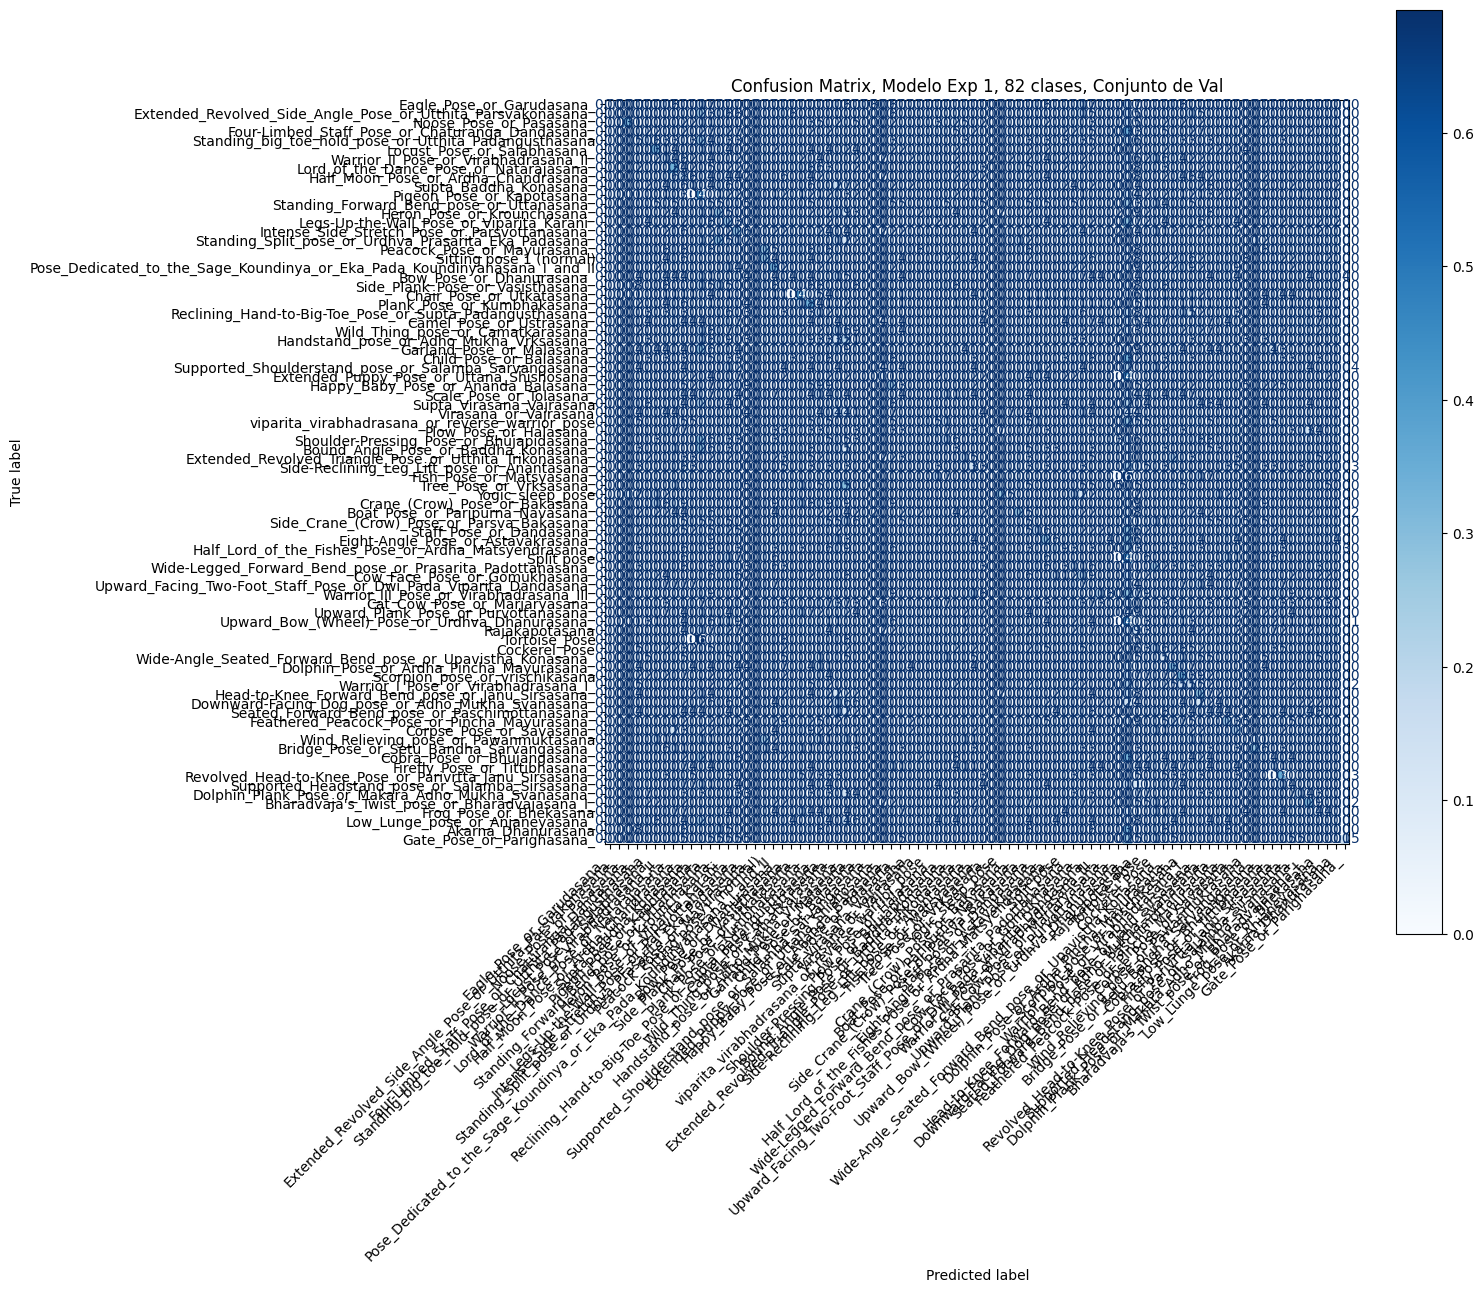

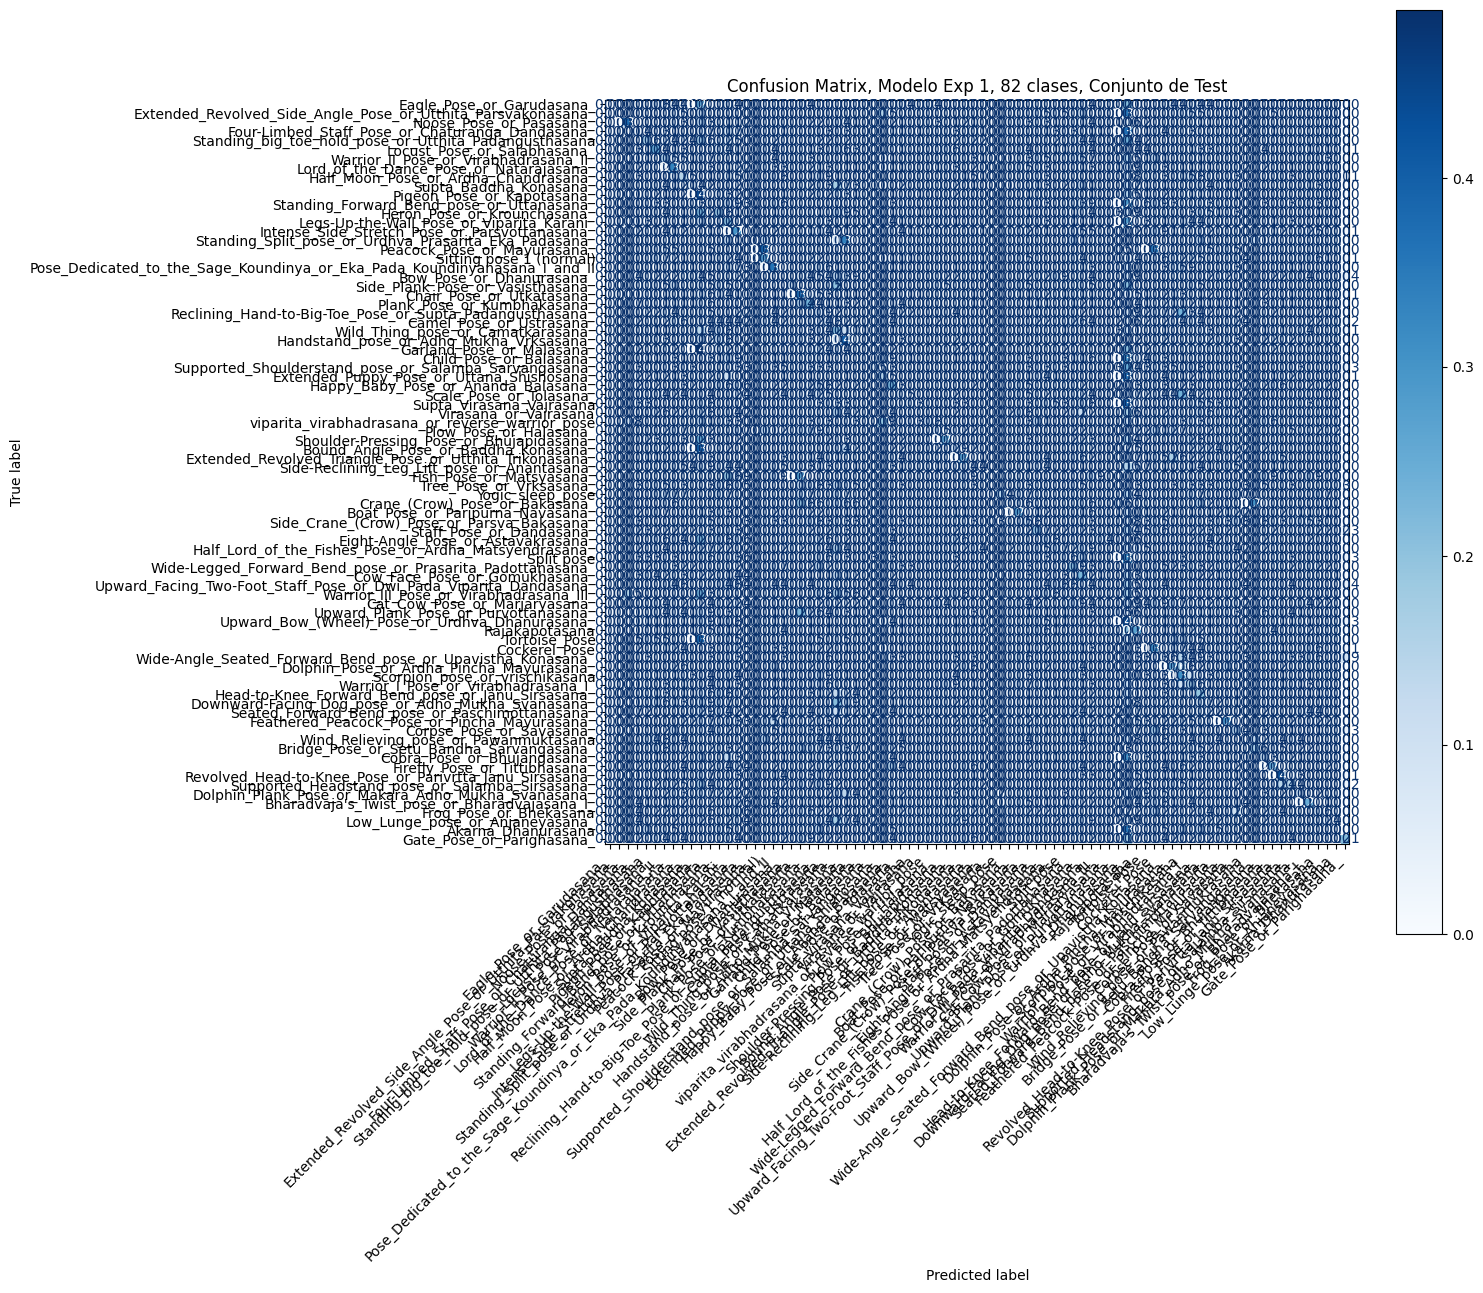

In [13]:
ruta_eval = ruta_modelo_inicial

lista_dataloaders = [train_loader,val_loader,test_loader]
graficar_metricas(list_dat=lista_dataloaders, ruta_mod=ruta_eval,
                  nombre_modelo='Exp 1, 82 clases',lista_clases=label_names_82)

---------------------

---------------------